#**Story Generation**

Text generation is the task of generating text with the goal of appearing
indistinguishable to human-written text.
Text generation is a subfield of natural language processing. It
leverages knowledge in computational linguistics and artificial
intelligence to automatically generate natural language texts, which can
satisfy certain communicative requirements.
Text is a form of sequence data, to a neural network it is but a sequence
of digits. Sequences like text can be generated by training a deep
learning model to predict the next word (for text) given a sequence of
words. For example, given an input “the cat is on the ma,” the network
is trained to predict the letter t, the next character.


## **Submitted by:** 

### 1) Ahmed Sayed Nousir	41810316
### 2) Mahmoud Tarek          41810058
### 3) Mariam Mohamed	      41810326


# **Import Library**

In [1]:
import tensorflow as tf
import numpy as np
import os
import time
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from string import punctuation
import string 
import re
from google.colab import drive
import nltk
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.utils import to_categorical
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences



# **Loading Data** 

In [2]:
#for colab
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#for colab
!unzip '/content/drive/MyDrive/Colab Notebooks/Treasure Island.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/Treasure Island.zip
   creating: Treasure Island/
  inflating: Treasure Island/Treasure Island.txt  


In [4]:
Story_Text = open('Treasure Island/Treasure Island.txt','rb').read().decode(encoding='utf-8')


# **Data Exploration and Preprocessing**



## **Read Data**

In [5]:
print(format(len(Story_Text))) # length of charcaters in text

392032


In [6]:
print(Story_Text[:250])

The Project Gutenberg EBook of Treasure Island, by Robert Louis Stevenson

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it


In [7]:
Story_vocab =sorted(set(Story_Text))
print("unique_chars:", Story_vocab)
n_unique_chars = len(Story_vocab) 
print("Number of unique characters:", n_unique_chars) 

unique_chars: ['\n', '\r', ' ', '!', '"', '#', '$', '%', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '‘', '’', '“', '”', '′', '″']
Number of unique characters: 90


## **lowercase** 
It is one of the most common preprocessing steps where the text is converted into the same case preferably lower case.

In [8]:
Story_Text = Story_Text.lower()


In [9]:
Story_vocab =sorted(set(Story_Text))
print("unique_chars:", Story_vocab)
n_unique_chars = len(Story_vocab) 
print("Number of unique characters:", n_unique_chars) 

unique_chars: ['\n', '\r', ' ', '!', '"', '#', '$', '%', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '@', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '‘', '’', '“', '”', '′', '″']
Number of unique characters: 65


## **Remove Punctuation:**
One of the text processing techniques is removing punctuations

In this step, all the punctuations from the text are removed. 
string library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}

we use two method to Remove Punctuation

1)by regex 

2) by maketrans



In [10]:
for i in Story_Text:
      
    # checking whether the char is punctuation.
    if i in string.punctuation:
          
        # Printing the punctuation values 
        print("Punctuation: " + i)
   

Streaming output truncated to the last 5000 lines.
Punctuation: ,
Punctuation: .
Punctuation: ;
Punctuation: ,
Punctuation: ,
Punctuation: ,
Punctuation: -
Punctuation: .
Punctuation: -
Punctuation: .
Punctuation: -
Punctuation: ,
Punctuation: .
Punctuation: -
Punctuation: ,
Punctuation: ,
Punctuation: .
Punctuation: ,
Punctuation: .
Punctuation: .
Punctuation: ;
Punctuation: ,
Punctuation: ,
Punctuation: ;
Punctuation: ,
Punctuation: ,
Punctuation: .
Punctuation: ,
Punctuation: -
Punctuation: -
Punctuation: ,
Punctuation: ,
Punctuation: -
Punctuation: -
Punctuation: ,
Punctuation: .
Punctuation: ,
Punctuation: .
Punctuation: ,
Punctuation: ,
Punctuation: -
Punctuation: .
Punctuation: .
Punctuation: ,
Punctuation: ,
Punctuation: .
Punctuation: ,
Punctuation: ,
Punctuation: .
Punctuation: ,
Punctuation: ,
Punctuation: -
Punctuation: -
Punctuation: ,
Punctuation: -
Punctuation: -
Punctuation: ,
Punctuation: .
Punctuation: ,
Punctuation: ,
Punctuation: -
Punctuation: .
Punctuation: ,
Punc

In [11]:
Story_Text = re.sub(r'[^\w\d\s]', '', Story_Text)

In [12]:
Story_vocab =sorted(set(Story_Text))
print("unique_chars:", Story_vocab)
n_unique_chars = len(Story_vocab) 
print("Number of unique characters:", n_unique_chars) 

unique_chars: ['\n', '\r', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of unique characters: 40


In [13]:
Story_Text = Story_Text.translate(str.maketrans("", "", punctuation))

In [14]:
Story_vocab =sorted(set(Story_Text))
print("unique_chars:", Story_vocab)
n_unique_chars = len(Story_vocab) 
print("Number of unique characters:", n_unique_chars) 

unique_chars: ['\n', '\r', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of unique characters: 39


### **Remove Stop words**
Stop words are words which are filtered out before or after processing of text. When applying machine learning to text, these words can add a lot of noise. That’s why we want to remove these irrelevant words.

{‘ourselves’, ‘hers’, ‘between’, ‘yourself’, ‘but’, ‘again’, ‘there’, ‘about’, ‘once’, ‘during’, ‘out’, ‘very’, ‘having’, ‘with’, ‘they’, ‘own’, ‘an’, ‘be’, ‘some’, ‘for’, ‘do’, ‘its’, ‘yours’, ‘such’, ‘into’, ‘of’, ‘most’, ‘itself’, ‘other’, ‘off’, ‘is’, ‘s’, ‘am’, ‘or’, ‘who’, ‘as’, ‘from’, ‘him’, ‘each’, ‘the’, ‘themselves’, ‘until’, ‘below’, ‘are’, ‘we’, ‘these’, ‘your’, ‘his’, ‘through’, ‘don’, ‘nor’, ‘me’, ‘were’, ‘her’, ‘more’, ‘himself’, ‘this’, ‘down’, ‘should’, ‘our’, ‘their’, ‘while’, ‘above’, ‘both’, ‘up’, ‘to’, ‘ours’, ‘had’, ‘she’, ‘all’, ‘no’, ‘when’, ‘at’, ‘any’, ‘before’, ‘them’, ‘same’, ‘and’, ‘been’, ‘have’, ‘in’, ‘will’, ‘on’, ‘does’, ‘yourselves’, ‘then’, ‘that’, ‘because’, ‘what’, ‘over’, ‘why’, ‘so’, ‘can’, ‘did’, ‘not’, ‘now’, ‘under’, ‘he’, ‘you’, ‘herself’, ‘has’, ‘just’, ‘where’, ‘too’, ‘only’, ‘myself’, ‘which’, ‘those’, ‘i’, ‘after’, ‘few’, ‘whom’, ‘t’, ‘being’, ‘if’, ‘theirs’, ‘my’, ‘against’, ‘a’, ‘by’, ‘doing’, ‘it’, ‘how’, ‘further’, ‘was’, ‘here’, ‘than’}


###**But in our project, we did not delete stop words because when we generate text without stop words, the text will be illogical**


## **Word Tokenization**
is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph.

In [15]:
#nltk.download("book")
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
Story_Text_token=word_tokenize(Story_Text)


In [17]:
word_tokenize(Story_Text)

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'treasure',
 'island',
 'by',
 'robert',
 'louis',
 'stevenson',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'united',
 'states',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 'reuse',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'wwwgutenbergorg',
 'if',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'united',
 'states',
 'youll',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'ebook',
 'title',
 'treasure',
 'island',
 'author',
 'robert',
 'louis',
 'stevenson',
 'illustrator',
 'louis',
 'rhead',
 'release',

In [18]:
len(Story_Text_token)

71393

# **Make Sequence**
## Our idea is based on the idea of N-gram
It is the idea of taking the current or previous words of the desired word with a specified number of words, the letter N denotes a specific number, and the word gram denotes the words. .

Thus we have what is called a unigram for dealing with each word separately, or a bigram system, which means dealing with two words, or a trigram system for dealing with three words
You can specify any numbers, there are 5 grams, 4 grams, and so on...

### In our project, we will train the model to take 25 words and predict the 26th word.. to understand 

### **X**=the project gutenberg ebook of treasure island by robert louis stevenson this ebook is for the use of anyone anywhere in the united states and


### **Y** = most

In [19]:
Sequence_train_len = 25+1 

T_sequences = []

for i in range(Sequence_train_len, len(Story_Text_token)):
    
    seq = Story_Text_token[i-Sequence_train_len:i]
    T_sequences.append(seq)

In [20]:
len(T_sequences)
#= (stroy text token - 26) 

71367

In [21]:
print(' '.join(T_sequences[0]))
print("*******************************************************************************************************")
print(' '.join(T_sequences[1]))
print("*******************************************************************************************************")
print(' '.join(T_sequences[2]))
print("*******************************************************************************************************")
print(' '.join(T_sequences[3]))
print("*******************************************************************************************************")
print(' '.join(T_sequences[4]))
print("*******************************************************************************************************")
print(' '.join(T_sequences[5]))

the project gutenberg ebook of treasure island by robert louis stevenson this ebook is for the use of anyone anywhere in the united states and most
*******************************************************************************************************
project gutenberg ebook of treasure island by robert louis stevenson this ebook is for the use of anyone anywhere in the united states and most other
*******************************************************************************************************
gutenberg ebook of treasure island by robert louis stevenson this ebook is for the use of anyone anywhere in the united states and most other parts
*******************************************************************************************************
ebook of treasure island by robert louis stevenson this ebook is for the use of anyone anywhere in the united states and most other parts of
*****************************************************************************************************

In [22]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(T_sequences) #In the case where texts contains lists, we assume each entry of the lists to be a token.
sequences = word_tokenizer.texts_to_sequences(T_sequences)

In [23]:
print(sequences[0])
print("*******************************************************************************************************")
print(sequences[1])
print("*******************************************************************************************************")
print(sequences[2])
print("*******************************************************************************************************")
print(sequences[3])
print("*******************************************************************************************************")
print(sequences[4])
print("*******************************************************************************************************")
print(sequences[5])
print("*******************************************************************************************************")

[1, 112, 304, 691, 3, 180, 116, 27, 1812, 1257, 1811, 26, 691, 43, 18, 1, 535, 3, 652, 3404, 8, 1, 567, 432, 2, 216]
*******************************************************************************************************
[112, 304, 691, 3, 180, 116, 27, 1812, 1257, 1811, 26, 691, 43, 18, 1, 535, 3, 652, 3404, 8, 1, 567, 432, 2, 216, 97]
*******************************************************************************************************
[304, 691, 3, 180, 116, 27, 1812, 1257, 1811, 26, 691, 43, 18, 1, 535, 3, 652, 3404, 8, 1, 567, 432, 2, 216, 97, 1813]
*******************************************************************************************************
[691, 3, 180, 116, 27, 1812, 1257, 1811, 26, 691, 43, 18, 1, 535, 3, 652, 3404, 8, 1, 567, 432, 2, 216, 97, 1813, 3]
*******************************************************************************************************
[3, 180, 116, 27, 1812, 1257, 1811, 26, 691, 43, 18, 1, 535, 3, 652, 3404, 8, 1, 567, 432, 2, 216, 97, 1813, 3, 1

In [24]:
len(word_tokenizer.index_word)
#number of uniqu word

6960

In [25]:
#to show index of each word
word_tokenizer.index_word


{1: 'the',
 2: 'and',
 3: 'of',
 4: 'a',
 5: 'i',
 6: 'to',
 7: 'was',
 8: 'in',
 9: 'he',
 10: 'you',
 11: 'that',
 12: 'had',
 13: 'it',
 14: 'with',
 15: 'his',
 16: 'as',
 17: 'my',
 18: 'for',
 19: 'on',
 20: 'but',
 21: 'at',
 22: 'we',
 23: 'me',
 24: 'not',
 25: 'all',
 26: 'this',
 27: 'by',
 28: 'were',
 29: 'said',
 30: 'have',
 31: 'him',
 32: 'now',
 33: 'one',
 34: 'so',
 35: 'be',
 36: 'or',
 37: 'out',
 38: 'if',
 39: 'man',
 40: 'they',
 41: 'from',
 42: 'there',
 43: 'is',
 44: 'up',
 45: 'captain',
 46: 'like',
 47: 'silver',
 48: 'no',
 49: 'well',
 50: 'when',
 51: 'could',
 52: 'what',
 53: 'us',
 54: 'would',
 55: 'then',
 56: 'doctor',
 57: 'been',
 58: 'upon',
 59: 'here',
 60: 'down',
 61: 'more',
 62: 'see',
 63: 'our',
 64: 'your',
 65: 'about',
 66: 'before',
 67: 'them',
 68: 'an',
 69: 'time',
 70: 'their',
 71: 'do',
 72: 'old',
 73: 'good',
 74: 'again',
 75: 'hand',
 76: 'into',
 77: 'her',
 78: 'still',
 79: 'long',
 80: 'last',
 81: 'some',
 82: 'ill

In [26]:
word_tokenizer.word_counts


OrderedDict([('the', 118728),
             ('project', 2262),
             ('gutenberg', 780),
             ('ebook', 303),
             ('of', 46901),
             ('treasure', 1410),
             ('island', 2217),
             ('by', 8744),
             ('robert', 87),
             ('louis', 140),
             ('stevenson', 89),
             ('this', 9242),
             ('is', 5708),
             ('for', 15771),
             ('use', 407),
             ('anyone', 331),
             ('anywhere', 46),
             ('in', 26853),
             ('united', 387),
             ('states', 518),
             ('and', 76321),
             ('most', 1196),
             ('other', 2496),
             ('parts', 78),
             ('world', 468),
             ('at', 11180),
             ('no', 4992),
             ('cost', 156),
             ('with', 17212),
             ('almost', 1066),
             ('restrictions', 52),
             ('whatsoever', 52),
             ('you', 22958),
             ('may',

In [27]:
W_size = len(word_tokenizer.word_counts)
W_size

6960

In [28]:
sequences_array = np.array(sequences)
sequences_array

array([[   1,  112,  304, ...,  432,    2,  216],
       [ 112,  304,  691, ...,    2,  216,   97],
       [ 304,  691,    3, ...,  216,   97, 1813],
       ...,
       [ 188,  566,    6, ..., 6960,    6,  204],
       [ 566,    6,    1, ...,    6,  204,   65],
       [   6,    1,  112, ...,  204,   65,  476]])

In [29]:
sequences_array.shape

(71367, 26)

# **Split Data**

In [30]:
X = sequences_array[:,:-1]
X

array([[   1,  112,  304, ...,  567,  432,    2],
       [ 112,  304,  691, ...,  432,    2,  216],
       [ 304,  691,    3, ...,    2,  216,   97],
       ...,
       [ 188,  566,    6, ..., 2368, 6960,    6],
       [ 566,    6,    1, ..., 6960,    6,  204],
       [   6,    1,  112, ...,    6,  204,   65]])

In [31]:
seq_len = X.shape[1]
seq_len

25

In [32]:
y = sequences_array[:,-1]
y

array([ 216,   97, 1813, ...,  204,   65,  476])

In [33]:
y = to_categorical(y, num_classes=W_size+1)


# **RNN and LSTM**
The concept of RNN:
It is mainly used with sequential data, which depends on the element of time, such as stock prices or
Weather data as well as texts, because a sentence:

"she spoke to her husband"

the word (her)
based on the word
(she)
What distinguishes her is that she treats her as if she had a memory to rely on

Advantages of Recurrent Neural Network

RNN can model sequence of data so that each sample can be assumed to be dependent on previous ones

Disadvantages of Recurrent Neural Network

It cannot process very long sequences 



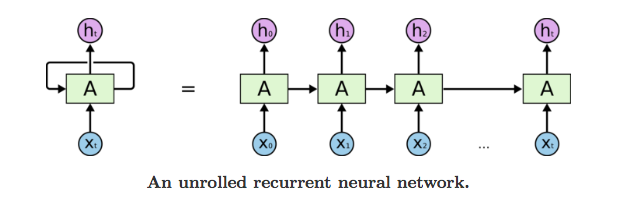

# **LSTM**
What is Long Short Term Memory (LSTM)?
Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory. The vanishing gradient problem of RNN is resolved here. LSTM is well-suited to classify, process and predict time series given time lags of unknown duration. It trains the model by using back-propagation. In an LSTM network, three gates are present:

Input gate — discover which value from input should be used to modify the memory. Sigmoid function decides which values to let through 0,1. and tanh function gives weightage to the values which are passed deciding their level of importance ranging from-1 to 1.

Forget gate — discover what details to be discarded from the block. 

Output gate — the input and the memory of the block is used to decide the output


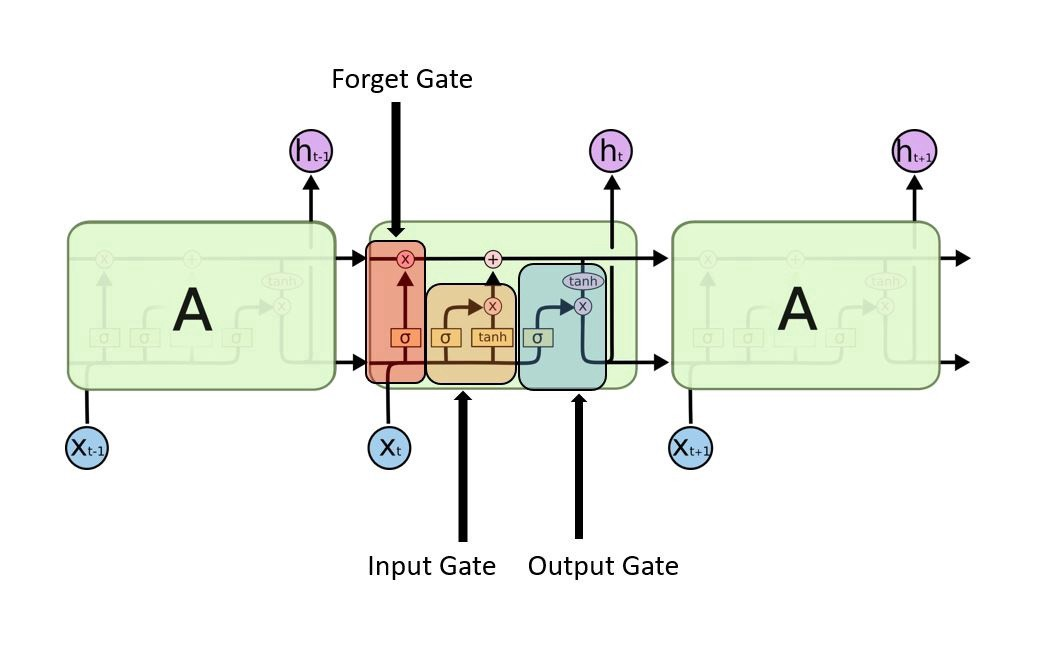

# **Word Embedding**

It means, an array of words that represent special values for each word, to determine its meaning, and to know how close or far this word is from the rest of the words

##**Keras Embedding Layer**
Keras offers an Embedding layer that can be used for neural networks on text data.

# **Build Model**

In [34]:
def create_model(W_size, seq_len):
    model = Sequential()
    model.add(Embedding(W_size, 25, input_length=seq_len))
    model.add(LSTM(150, return_sequences=True))
    model.add(LSTM(150))
    model.add(Dense(150, activation='relu'))

    model.add(Dense(W_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   
    model.summary()
    
    return model

In [35]:
# define model
model = create_model(W_size+1, seq_len)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 25)            174025    
                                                                 
 lstm (LSTM)                 (None, 25, 150)           105600    
                                                                 
 lstm_1 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 150)               22650     
                                                                 
 dense_1 (Dense)             (None, 6961)              1051111   
                                                                 
Total params: 1,533,986
Trainable params: 1,533,986
Non-trainable params: 0
_________________________________________________________________


In [36]:
history=model.fit(X, y, batch_size=128, epochs=250,verbose=1)


Epoch 1/250
558/558 [==============================] - 23s 29ms/step - loss: 6.6230 - accuracy: 0.0640
Epoch 2/250
558/558 [==============================] - 16s 28ms/step - loss: 6.2012 - accuracy: 0.0762
Epoch 3/250
558/558 [==============================] - 16s 28ms/step - loss: 5.9950 - accuracy: 0.0855
Epoch 4/250
558/558 [==============================] - 16s 28ms/step - loss: 5.8646 - accuracy: 0.0892
Epoch 5/250
558/558 [==============================] - 15s 27ms/step - loss: 5.7308 - accuracy: 0.1014
Epoch 6/250
558/558 [==============================] - 15s 28ms/step - loss: 5.6142 - accuracy: 0.1107
Epoch 7/250
558/558 [==============================] - 15s 28ms/step - loss: 5.5131 - accuracy: 0.1162
Epoch 8/250
558/558 [==============================] - 15s 28ms/step - loss: 5.4208 - accuracy: 0.1206
Epoch 9/250
558/558 [==============================] - 15s 28ms/step - loss: 5.3327 - accuracy: 0.1235
Epoch 10/250
558/558 [==============================] - 15s 28ms/step - l

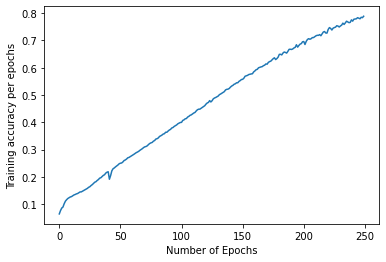

In [37]:
#plotting the training accuracy of the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel("Number of Epochs")
plt.ylabel('Training accuracy per epochs')
plt.show()

# **Generate New Text**

In [38]:
def generate_text(model, tokenizer, text_seq_length, seed_text, n_words):
 
    #INPUTS:
    #model : model that was trained on text data
    #tokenizer : tokenizer that was fit on text data
    #text_seq_length : length of training sequence
    #seed_text : raw string text to serve as the seed
    #n_words : number of words to be generated by model
    
  # Final Output
  output_text = []
  
  for _ in range(n_words):
    # Take the input text string and encode it to a sequence
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    # Pad sequences :is used to ensure that all sequences in a list have the same length.
    encoded = pad_sequences([encoded], maxlen = text_seq_length, truncating='pre')

    # Predict Class Probabilities for each word
    y_predict=model.predict(encoded) 
    classes_x=np.argmax(y_predict,axis=1)


    predicted_word = ''
    for word, index in tokenizer.word_index.items():
      if index == classes_x:
        predicted_word = word
        break
    seed_text = seed_text + ' ' + predicted_word
    output_text.append(predicted_word)
  return ' '.join(output_text)

In [39]:
import random
random.seed(101)
random_pick = random.randint(0,len(T_sequences))
random_seed_text = T_sequences[random_pick]
seed_text = ' '.join(random_seed_text)
seed_text

'my lads said he weve had a hot day and are all tired and out of sorts a turn ashorell hurt nobodythe boats are still in'

In [40]:
generate_text(model, word_tokenizer, seq_len, seed_text, 1000)


'the water island like cliffs out with their barkings i take it next thats long fouled the money you began to grow dark and ready but hailed captain the use of or distributing drink for the old admiral benbow i all not charge our calfs open in the seams the nasty stench of the trees and of that day or any other and a full thing behind all at last i should fall to us to advance the squire at the same instant that if he judged the gamekeeper come to me to be seen in that his interests jumped to their voices which suggested itself in the centre after possible hard we have the worry of the shore from which israel still pretty complained of it rather roughly still in the volume and the tails of the corner the work lay at a look though the side of the money had fallen on deck and at last i began to pay a replacement copy under the stockade and as now some of the man ashore and where of great spirit there was a shot on the top and he was hunched enough plain when we go to keep rather distant 